In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("tourism.csv")

In [3]:
df.head()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C03622V04362,Country,C02293V02763,Direction,UNIT,VALUE
0,ASA03,Air and Sea Travel,2010,2010,-,All countries,1,Arrivals,Thousand,12902.2
1,ASA03,Air and Sea Travel,2010,2010,-,All countries,2,Departures,Thousand,12920.2
2,ASA03,Air and Sea Travel,2010,2010,AE,United Arab Emirates,1,Arrivals,Thousand,99.0
3,ASA03,Air and Sea Travel,2010,2010,AE,United Arab Emirates,2,Departures,Thousand,99.0
4,ASA03,Air and Sea Travel,2010,2010,AT,Austria,1,Arrivals,Thousand,65.3


In [4]:
df.tail()

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C03622V04362,Country,C02293V02763,Direction,UNIT,VALUE
1195,ASA03,Air and Sea Travel,2024,2024,ZZEUBQAC,Other Europe (33),2,Departures,Thousand,68.3
1196,ASA03,Air and Sea Travel,2024,2024,ZZZ11,Other Countries(43),1,Arrivals,Thousand,1.7
1197,ASA03,Air and Sea Travel,2024,2024,ZZZ11,Other Countries(43),2,Departures,Thousand,1.7
1198,ASA03,Air and Sea Travel,2024,2024,ZZZ13,Other transatlantic countries(2),1,Arrivals,Thousand,97.0
1199,ASA03,Air and Sea Travel,2024,2024,ZZZ13,Other transatlantic countries(2),2,Departures,Thousand,99.3


In [5]:
df.shape

(1200, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        1200 non-null   object 
 1   STATISTIC Label  1200 non-null   object 
 2   TLIST(A1)        1200 non-null   int64  
 3   Year             1200 non-null   int64  
 4   C03622V04362     1200 non-null   object 
 5   Country          1200 non-null   object 
 6   C02293V02763     1200 non-null   int64  
 7   Direction        1200 non-null   object 
 8   UNIT             1200 non-null   object 
 9   VALUE            1200 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 93.9+ KB


In [7]:
df.describe()

,TLIST(A1),Year,C02293V02763,VALUE
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,2017.000000,2017.000000,1.500000,759.291500
std,4.322295,4.322295,0.500208,2654.720721
min,2010.000000,2010.000000,1.000000,0.000000
25%,2013.000000,2013.000000,1.000000,29.725000
50%,2017.000000,2017.000000,1.500000,75.600000
75%,2021.000000,2021.000000,2.000000,266.950000
max,2024.000000,2024.000000,2.000000,21458.500000


array([[<Axes: title={'center': 'Year'}>]], dtype=object)

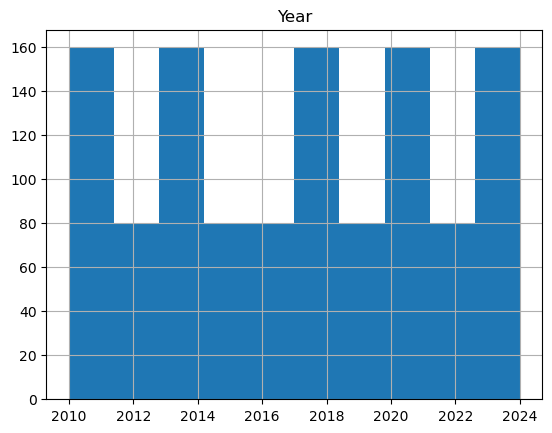

In [8]:
df.hist(column="Year", bins=10)

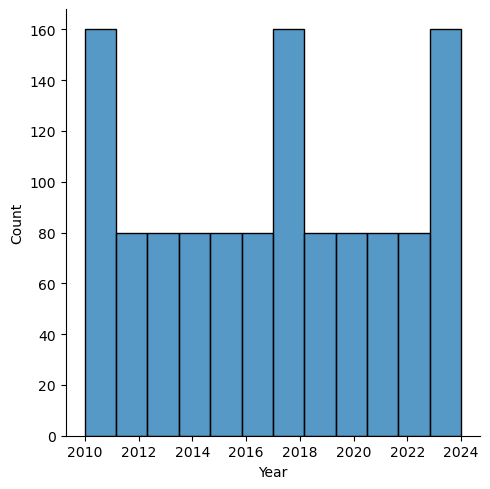

In [9]:
sns.displot(data=df, x="Year")

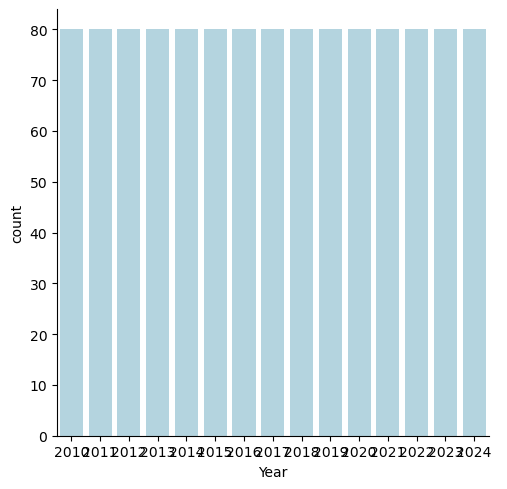

In [10]:
sns.catplot(data=df, x="Year", color="lightblue", kind="count")

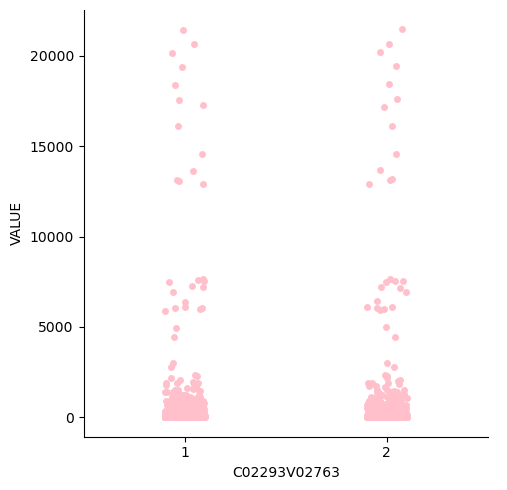

In [11]:
sns.catplot(data=df, x="C02293V02763", y="VALUE", color="pink")

<Axes: xlabel='Year', ylabel='VALUE'>

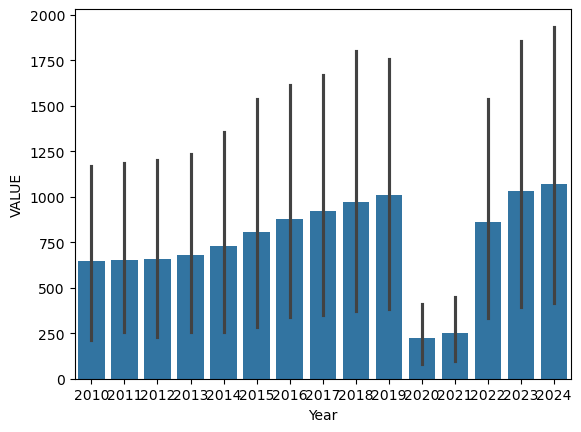

In [12]:
sns.barplot(x="Year", y="VALUE", data=df, estimator=np.mean)